<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP5/Practico5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 5

Creado por: Lara Negri

## Descripción del práctico

El objetivo de este trabajo es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes.

En primer lugar se debe cargar una imagen, generar la TF directa de la imagen y ver su espectro.
A partir del espectro generado mediante la TF inversa obtener la imagen.

El programa debe permitir guardar el espectro de amplitud de una imagen en un bitmap y cargar el espectro de imagen a partir de un bitmap. Para esto se deben hacer pruebas con diferentes figuras geométricas.
Adicionalmente con una imagen a elección se debe guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (en este caso Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.

## Librerias requeridas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funciones a utilizar

In [ ]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im
  
  # Obtener el canal R normalizado de una imagen
def get_R(im):
  R = im[:, :, 0]
  return R

  # Obtener el canal G normalizado de una imagen
def get_G(im):
  G = im[:, :, 1]
  return G

  # Obtener el canal B normalizado de una imagen
def get_B(im):
  B = im[:, :, 2]
  return B

## Selección de Imagen

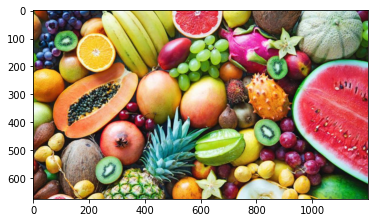

In [ ]:
#@title Selecccione la imagen { run: "auto" }

circle = 'http://billjohnsononline.com/wp-content/uploads/2017/03/The-Black-Dot-Experiment-e1490060434852.jpg'
triangle ='http://www.pmlive.com/__data/assets/image/0008/451799/MHRA_black_triangle_symbol.jpg'
elipse = 'https://img.freepik.com/iconos-gratis/elipse-geometrico_318-10353.jpg?size=338&ext=jpg'
fruits = 'https://www.lavanguardia.com/files/og_thumbnail/uploads/2019/06/04/5e99794702a16.jpeg'
Imagen = 'fruits' #@param ["circle", "triangle", "elipse", "fruits"]

if Imagen == 'circle':
  im = get_image(circle)
  plt.imshow(im) 
  plt.show()
elif Imagen == 'triangle':
  im = get_image(triangle)
  plt.imshow(im) 
  plt.show()
elif Imagen == 'elipse':
  im = get_image(elipse)
elif Imagen == 'fruits':
  im = get_image(fruits)
  plt.imshow(im) 
  plt.show()

## Definición de Función Transformada de Fourier

In [ ]:
def fourier_transform(im):
  # Obtenemos la luminancia Y de la imagen

  #Primero necesito los valores de R, G, B de las imágenes

  R = get_R(im)/255
  G = get_G(im)/255
  B = get_B(im)/255

  #Obtengo los valores de YIQ
  Y = (0.299*R + 0.587*G + 0.114*B)
  I = 0.595716*R + -0.274453*G + -0.321263*B
  Q = 0.211456*R + -0.522591*G + 0.311135*B

  Y = np.array(np.clip(Y, 0, 1))

  #Realizamos la transformada de Fourier utilizando la función existente para dicho propósito de numpy
  TF = np.fft.fftshift(np.fft.fft2(Y))

  fftmod = np.abs(TF) #módulo de la TF
  mod = 30*np.log10(fftmod) + 85
  print(np.max(mod), np.min(mod))
  mod2 = mod.astype('uint8')
  phase = np.angle(TF) #fase de la TF

  plt.imsave('/content/drive/MyDrive/Imagenes PDI/module.bmp', mod2, cmap = 'gray')

  plt.figure(0)
  plt.imshow(Y,'gray')
  plt.title('Imagen original')
  plt.figure(1)
  plt.imshow(np.log(mod),'gray')
  plt.title('Módulo Transformada de Fourier')
  plt.figure(2)
  plt.imshow(phase,'gray')
  plt.title('Fase Transformada de Fourier')
  plt.show()

  #Ahora tomamos los datos de la transformada, para generar, a través de la Transfomada Inversa de Fourier, la imagen original
  A = mod*(np.cos(phase) + np.sin(phase)*1j) #Esto es por definición

  fftmod = io.imread('/content/drive/MyDrive/Imagenes PDI/module.bmp')

  fftmodfinal = fftmod[:, : ,0 ] #Sólo me interesa el primer canal
  fftmodfinal = np.power(10,fftmodfinal/30)-85

  A = fftmodfinal*(np.cos(phase) + np.sin(phase)*1j) #Reemplazo el módulo por lo obtenido en la imagen .bmp

  ITF = np.abs(np.fft.ifft2(A))
  plt.figure(0)
  plt.title('Imagen Reconstruida con AntiTransformada de Fourier')
  plt.imshow(ITF,'gray')
  plt.show()

  #Ahora editamos el módulo y antitransformamos para ver cómo se modifica la imagen
  fftmod[300:400, 400:800, :] = 0 # selecciono el pixel/rango de pixeles que voy a modificar
  plt.figure(0)
  plt.title('Módulo editado')
  plt.imshow(fftmod,'gray')
  plt.show()

  fftmodfinal = np.power(10,fftmod[:,:,0]/30)-85

  A = fftmodfinal*(np.cos(phase) + np.sin(phase)*1j) #Reemplazo el módulo por lo obtenido en la imagen .bmp

  ITF = np.abs(np.fft.ifft2(A))
  plt.figure(1)
  plt.title('Antitransformada con módulo editado')
  plt.imshow(ITF,'gray')

## Aplicativo Transformada de Fourier

Button(description='FFT + Reconstrucción de imagen con iFFT', style=ButtonStyle())

Output()

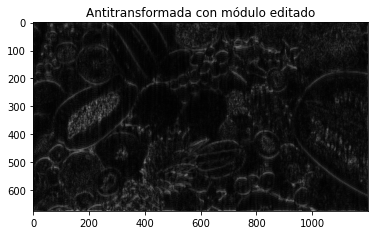

In [ ]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="FFT + Reconstrucción de imagen con iFFT")
output = widgets.Output()

def on_button_clicked(b):
  # Defino lo que hace el output
  with output:
    fourier_transform(im)

button.on_click(on_button_clicked)
display(button, output)

## Conclusiones

En primer lugar, es importante destacar la importancia del escalado de los datos. La transformada de Fourier nos da "por default" valores de módulo (amplitud) que son muy cercanos entre sí. Por lo tanto, al antitransformar los valores obtenidos para reconstruir la imagen original, no se aprecia con claridad el resultado. De esta forma, es esencial que hagamos el escalado correspondiente, para poder "estirar" los valores de los píxeles y que estos recorran el rango completo de [0,255]. \
Otra cosa importante para resaltar, es que, en este trabajo se utilizó un escalado genérico que puediera aplicarse a las 4 imágenes propuestas como ejemplo, sin que ninguna se fuera del rango mencionado. Esto implica que el escalado no es el óptimo para ninguna de las imágenes.\
Al realizar el trabajo e ir probando con distintos escalados, se pudo observar que al trabajar con el mejor escalado posible para cada imagen (haciendo que los valores mínimo y máximo del módulo de la Transformada de Fourier coincidan con 0 y 255 respectivamente) la imagen final obtenida a partir de la antitransformada, era prácticamente identica a la original.\
Sin embargo, con el escalado que se presenta en este momento, podemos ver con claridad, especialmente en las figuras geométricas, que aparece una especie de sombra en la imagen final (obtenida a partir de la antitransformada), que distorciona un poco la imagen. Esto es producto de no estar utilizando un escalado 100% adecuado para la imagen.\
Por último, me parece importante comentar que al trabajar con un módulo editado de la imagen, se puede apreciar facilmente que por lo general, las partes del módulo que se ven más de fondo, es decir, el "ruido gris", no contienen información sustancial de la imagen. Esto puede notarse ya que al modificar esa parte del módulo y luego antitransformar, la imagen obtenida es muy similar a la original. Sin embargo, si editamos partes más "llamativas" del módulo, por ejemplo si en el centro hay una cruz, o algunos puntos blancos más característicos, sí varía sustancialmente la imagen obtenida a través de la antitransformada.